In [126]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from TrackReconstruction_functions import *
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 
import plotly.express as px
import plotly.io as pio


In [403]:
diff = "nodiff"
# diff = "0.25percent"
pressure = 1

# Set the detector size depending on the pressure
det_size = int(np.cbrt(6000**3/pressure)/2.0) 
print(det_size)

# Load in the signal metadata
nubb_meta = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_{pressure}bar_{diff}_reco.h5", "meta")
nubb_meta["Type"] = "0nubb"
display(nubb_meta)

# ----------------------------------------------------------------------------------------------------

# Load in the background
Bkg_meta = pd.DataFrame()
Tl_meta = pd.DataFrame()
Bi_meta = pd.DataFrame()

Tl_meta = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_{pressure}bar_{diff}_reco.h5", "meta")
Tl_meta["Type"] = "Tl"
Bi_meta = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_{pressure}bar_{diff}_reco.h5", "meta")
Bi_meta["Type"] = "Bi"
Bkg_meta = pd.concat([Tl_meta, Bi_meta])
display(Bkg_meta)

# ----------------------------------------------------------------------------------------------------
# Load in the files for plotting the background events

Tl                = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_{pressure}bar_{diff}_reco.h5",    "data")
# Tl_true_hits      = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_{pressure}bar_nexus_filtered.h5", "MC/hits")
# Tl_true_parts     = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_{pressure}bar_nexus_filtered.h5", "MC/particles")

Bi                = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_{pressure}bar_{diff}_reco.h5",    "data")
# Bi_true_hits      = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_{pressure}bar_nexus_filtered.h5", "MC/hits")
# Bi_true_parts     = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_{pressure}bar_nexus_filtered.h5", "MC/particles")

# Tl_diffused_hits  = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_{pressure}bar_{diff}_filtered.h5", "MC/hits")
# Bi_diffused_hits  = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_{pressure}bar_{diff}_filtered.h5", "MC/hits")


# Shift the positions
Tl["Type"] = "Tl"
Bi["Type"] = "Bi"
# Tl_true_hits["z"] = Tl_true_hits["z"] + det_size
# Bi_true_hits["z"] = Bi_true_hits["z"] + det_size

Bkg            =  pd.concat([Tl, Bi])
# Bkg_true_hits  =  pd.concat([Tl_true_hits, Bi_true_hits])
# Bkg_true_parts =  pd.concat([Tl_true_parts, Bi_true_parts])
# Bkg_diffused_hits = pd.concat([Tl_diffused_hits, Bi_diffused_hits])

# ----------------------------------------------------------------------------------------------------
# Load in the pickle files
bi_file = f"../data/Trackreco/ATPC_Bi_{pressure}bar_{diff}_trackreco.pkl"
tl_file = f"../data/Trackreco/ATPC_Tl_{pressure}bar_{diff}_trackreco.pkl"

# Load Bi data
with open(bi_file, 'rb') as pickle_file:
    Tracks_Bi = pickle.load(pickle_file)
    connections_Bi = pickle.load(pickle_file)
    connection_counts_Bi = pickle.load(pickle_file)

# Load Tl data
with open(tl_file, 'rb') as pickle_file:
    Tracks_Tl = pickle.load(pickle_file)
    connections_Tl = pickle.load(pickle_file)
    connection_counts_Tl = pickle.load(pickle_file)

# Merge dictionaries
Bkg_Tracks = {**Tracks_Bi, **Tracks_Tl}
Bkg_connections = {**connections_Bi, **connections_Tl}
Bkg_connection_counts = {**connection_counts_Bi, **connection_counts_Tl}

# ----------------------------------------------------------------------------------------------------




3000


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label,Type
0,150,0,1,11,806,3099.387,2.007783,0.556586,0.437794,0.712355,0.621364,4.912382,4.520291,11.352677,9.764378,Primary,0nubb
0,150,1,0,363,314,133.068,0.218959,0.218959,0.218959,0.000000,0.218959,1.892463,1.892463,3.272836,3.272836,Delta0,0nubb
0,150,2,0,570,508,221.415,0.131589,0.131589,0.131589,0.000000,0.131589,2.394289,2.443388,6.800890,7.046699,Delta0,0nubb
0,150,3,0,27,69,16.511,0.097290,0.097290,0.097290,0.097290,0.097290,1.746650,1.746650,0.998137,0.998137,Brem,0nubb
0,151,0,1,993,529,3440.383,2.312352,0.527322,0.520378,0.499150,0.501580,2.016479,2.764672,4.298199,7.525400,Primary,0nubb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1559,1,0,450,543,47.703,0.050022,0.050022,0.050022,0.000000,0.050022,2.542236,2.542236,2.775798,2.775798,Delta0,0nubb
0,1559,2,0,809,302,260.544,0.202343,0.202343,0.202343,0.000000,0.202343,1.457437,1.363697,3.146838,2.839444,Delta0,0nubb
0,1559,3,0,302,364,46.390,0.130051,0.130051,0.130051,0.000000,0.130051,2.238209,2.238209,2.606576,2.606576,Delta1,0nubb
0,1559,4,0,126,126,0.000,0.022022,0.022022,0.022022,0.022022,0.022022,0.000000,0.000000,0.000000,0.000000,Brem,0nubb


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label,Type
0,335000,0,1,79,679,1554.547,0.993141,0.483054,0.258466,0.729170,0.135830,3.178785,1.170008,7.255959e+00,2.570518e+00,Primary,Tl
0,335000,1,0,270,508,1472.551,1.141395,0.314092,0.606112,0.442134,0.769966,1.045208,1.902382,1.133897e+00,3.799265e+00,Brem,Tl
0,335000,2,0,832,809,100.037,0.189447,0.189447,0.189447,0.000000,0.189447,2.777771,2.777771,6.204369e+00,6.204369e+00,BremDelta0,Tl
0,335001,0,1,732,0,2832.883,1.705298,0.434074,0.393650,0.730310,0.250802,2.755907,1.220509,7.076464e+00,1.133163e+00,Primary,Tl
0,335001,1,0,836,882,622.411,0.666178,0.459966,0.592943,0.116858,0.639245,1.202429,3.261272,2.669178e+00,5.263157e+00,Brem,Tl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1100058,2,0,28,56,178.377,0.254200,0.254200,0.254200,0.254200,0.254200,2.419233,2.419233,4.279221e+00,4.279221e+00,Brem,Bi
0,1100058,3,0,0,1,1.229,0.029884,0.029884,0.029884,0.029884,0.029884,1.000000,1.000000,6.061558e-09,6.061558e-09,Brem,Bi
0,1100059,0,1,635,936,1982.709,1.331487,0.468968,0.231756,0.563977,0.105326,2.871635,1.037424,6.546070e+00,1.172065e+00,Primary,Bi
0,1100059,1,0,120,39,519.541,0.500018,0.426659,0.496595,0.000000,0.500018,2.079038,2.149730,6.663400e+00,5.302558e+00,Delta0,Bi


In [420]:
nubb_events = len(nubb_meta.event_id.unique())
Bkg_events = len(Bkg_meta.event_id.unique())

print(nubb_events)
print(Bkg_events)

sf_bkg = nubb_events/Bkg_events
print("Bkg scale factor:", sf_bkg)

186230
343620
Bkg scale factor: 0.5419649612944532


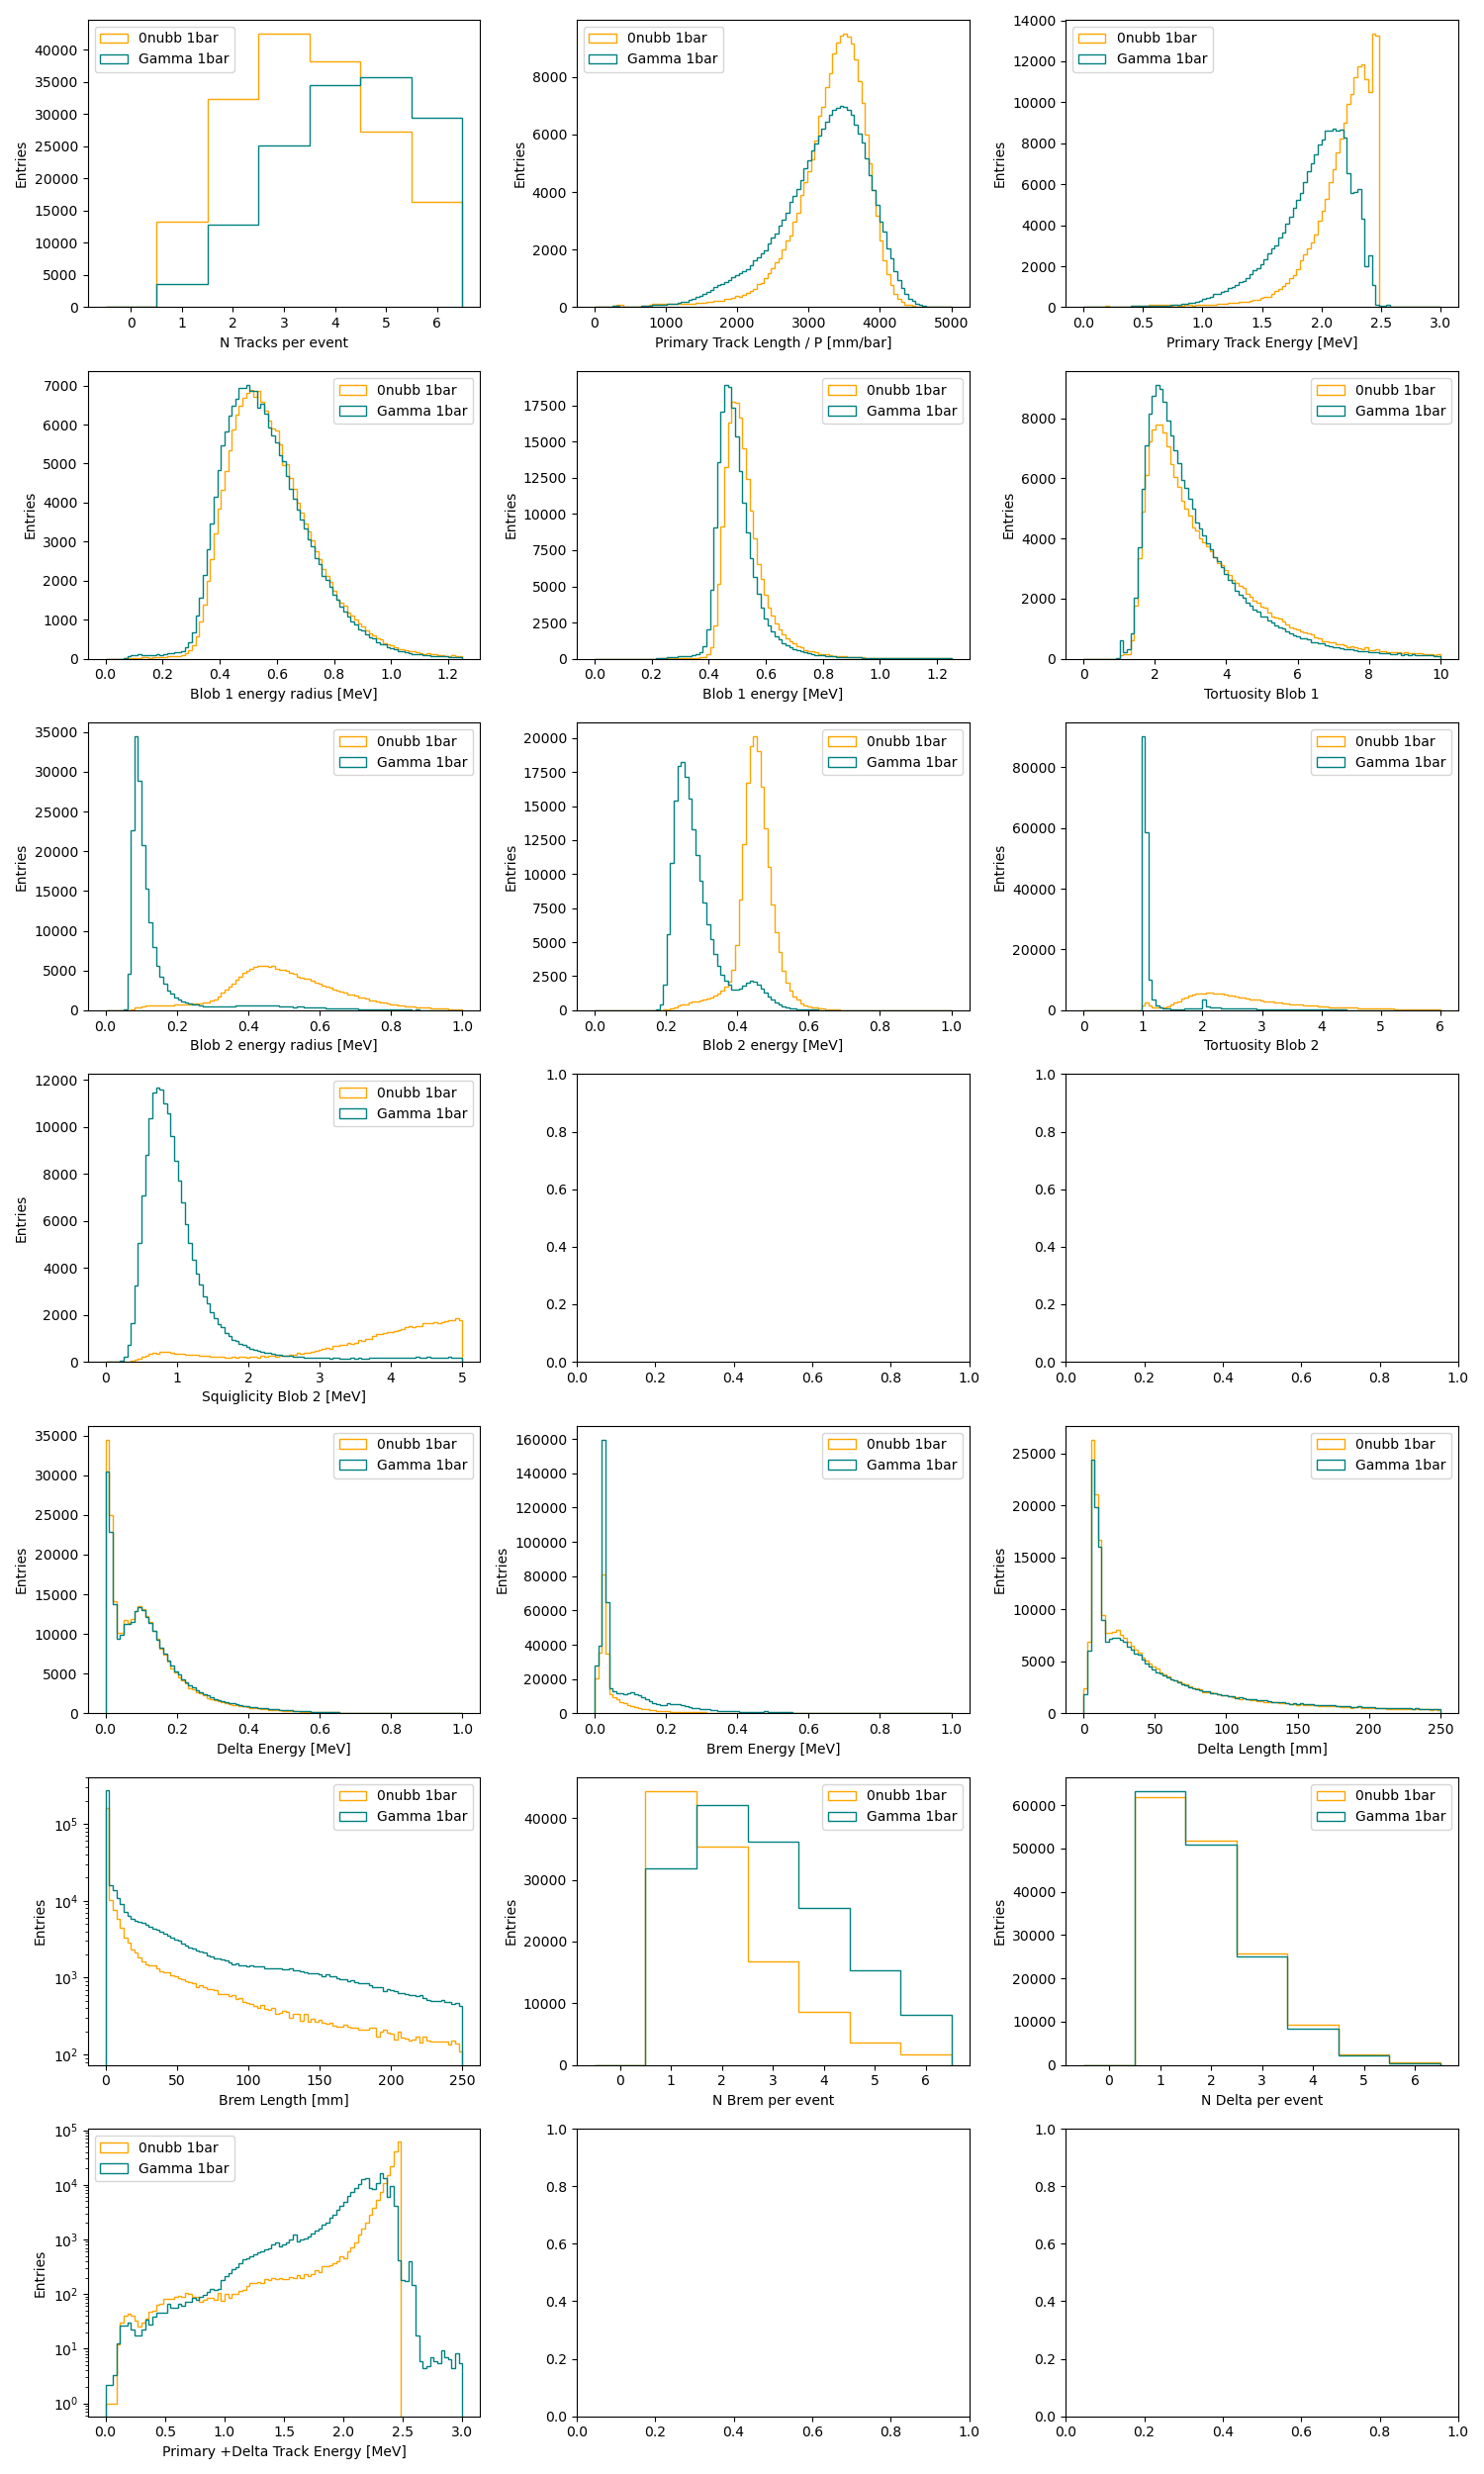

In [423]:
# Plot some variables like number of tracks
%matplotlib widget

def GetNLongTracks(df_meta):

    # Set threshold for cumulative_distance
    threshold = 0

    # Step 1: Filter rows based on cumulative_distance
    filtered_df = df_meta[df_meta["length"] >= threshold]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": "N_tracks"}, inplace=True)

    return trk_counts


def GetNParticles(df_meta, label):
    # Set threshold for cumulative_distance
    threshold = 0

    # Filter events with brem in the name
    filtered_df = df_meta[df_meta["label"].str.contains(label, na=False)]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": f"N_{label}"}, inplace=True)

    return trk_counts


def GetDeltas(df_meta):
    filtered_df = df_meta[df_meta["label"].str.contains("Delta", na=False)]

    return filtered_df

def GetBrems(df_meta):
    filtered_df = df_meta[df_meta["label"].str.contains("Brem", na=False)]

    return filtered_df

# Gets the sum of the primary track and the delta energies
def GetTrackDeltaEnergy(df_meta):
    # Filter events with brem in the name
    filtered_df = df_meta[ ~df_meta["label"].str.contains("Brem", na=False)]
    filtered_df =filtered_df[filtered_df.energy>0.01]
    trk_energies = filtered_df.groupby(["event_id"])["energy"].sum()
    return trk_energies.values


def PlotDistributions(df_meta, col, label, scale_factor):

    df_counts = GetNLongTracks(df_meta)
    df_counts_evts = df_counts[df_counts.N_tracks >= 1].event_id.unique()

    # Number of brems and deltas
    N_brem = GetNParticles(df_meta, "Brem")
    N_delta = GetNParticles(df_meta, "Delta")

    # Dataframes containing brems and deltas
    deltas = GetDeltas(df_meta)
    brems  = GetBrems(df_meta)

    # This is the sum of the primary and delta energies attached to it
    trk_e = GetTrackDeltaEnergy(df_meta)

    df_primary = df_meta[df_meta.primary == 1]

    bin_edges = np.arange(-0.5, 7.5, 1)
    bin_centers = np.arange(0, 7, 1)

    # Define the weights
    weights        = np.ones_like(df_primary.energy)  * scale_factor
    weights_counts = np.ones_like(df_counts.N_tracks) * scale_factor
    weights_deltas = np.ones_like(deltas.energy)      * scale_factor
    weights_brem   = np.ones_like(brems.energy)       * scale_factor
    weights_Ndelta = np.ones_like(N_delta.N_Delta)    * scale_factor
    weights_Nbrem  = np.ones_like(N_brem.N_Brem)      * scale_factor
    weights_trke   = np.ones_like(trk_e)              * scale_factor


    # Multiplicities
    axs[0,0].hist(df_counts.N_tracks, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_counts);
    # axs[0,0].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label);
    axs[0,0].set_xlabel("N Tracks per event")
    axs[0,0].set_ylabel("Entries")
    axs[0,0].set_xticks(bin_centers) ;
    axs[0,0].legend()

    axs[0,1].hist(df_primary.length, bins = np.linspace(0, 5000/pressure, 100), histtype="step", color = col, label = label, weights = weights);
    axs[0,1].set_xlabel("Primary Track Length / P [mm/bar]")
    axs[0,1].set_ylabel("Entries")
    axs[0,1].legend()

    axs[0,2].hist(df_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights);
    axs[0,2].set_xlabel("Primary Track Energy [MeV]")
    axs[0,2].set_ylabel("Entries")
    axs[0,2].legend()

    axs[1,1].hist(df_primary.blob1, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,1].set_xlabel("Blob 1 energy [MeV]")
    axs[1,1].set_ylabel("Entries")
    axs[1,1].legend()

    axs[2,1].hist(df_primary.blob2, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,1].set_xlabel("Blob 2 energy [MeV]")
    axs[2,1].set_ylabel("Entries")
    axs[2,1].legend()

    axs[1,0].hist(df_primary.blob1R, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,0].set_xlabel("Blob 1 energy radius [MeV]")
    axs[1,0].set_ylabel("Entries")
    axs[1,0].legend()

    axs[2,0].hist(df_primary.blob2R, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,0].set_xlabel("Blob 2 energy radius [MeV]")
    axs[2,0].set_ylabel("Entries")
    axs[2,0].legend()

    axs[1,2].hist(df_primary.Tortuosity1, bins = np.linspace(0, 10, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,2].set_xlabel("Tortuosity Blob 1")
    axs[1,2].set_ylabel("Entries")
    axs[1,2].legend()

    axs[2,2].hist(df_primary.Tortuosity2, bins = np.linspace(0, 6, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,2].set_xlabel("Tortuosity Blob 2")
    axs[2,2].set_ylabel("Entries")
    axs[2,2].legend()

    axs[3,0].hist(df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,0].set_xlabel("Squiglicity Blob 2 [MeV]")
    axs[3,0].set_ylabel("Entries")
    axs[3,0].legend()

    # axs[3,1].hist(df_primary.TortuosityA2, bins = np.linspace(10, 700, 100), histtype="step", color = col, label = label, weights = weights);
    # axs[3,1].set_xlabel("Tortuosity Blob 2 Area Method")
    # axs[3,1].set_ylabel("Entries")
    # axs[3,1].legend()

    # axs[3,2].hist(df_primary.SquiglicityA2, bins = np.linspace(0, 600, 100), histtype="step", color = col, label = label, weights = weights);
    # axs[3,2].set_xlabel("Squiglicity Blob 2 Area Method")
    # axs[3,2].set_ylabel("Entries")
    # axs[3,2].legend()

    axs[4,0].hist(deltas.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,0].set_xlabel("Delta Energy [MeV]")
    axs[4,0].set_ylabel("Entries")
    axs[4,0].legend()

    axs[4,1].hist(brems.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[4,1].set_xlabel("Brem Energy [MeV]")
    axs[4,1].set_ylabel("Entries")
    axs[4,1].legend()

    axs[4,2].hist(deltas.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,2].set_xlabel("Delta Length [mm]")
    axs[4,2].set_ylabel("Entries")
    axs[4,2].legend()

    axs[5,0].hist(brems.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[5,0].set_xlabel("Brem Length [mm]")
    axs[5,0].set_ylabel("Entries")
    axs[5,0].semilogy()
    axs[5,0].legend()

    axs[5,1].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Nbrem);
    axs[5,1].set_xlabel("N Brem per event")
    axs[5,1].set_ylabel("Entries")
    axs[5,1].set_xticks(bin_centers) ;
    axs[5,1].legend()

    axs[5,2].hist(N_delta.N_Delta, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Ndelta);
    axs[5,2].set_xlabel("N Delta per event")
    axs[5,2].set_ylabel("Entries")
    axs[5,2].set_xticks(bin_centers) ;
    axs[5,2].legend()

    axs[6,0].hist(trk_e, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights_trke);
    axs[6,0].set_xlabel("Primary +Delta Track Energy [MeV]")
    axs[6,0].set_ylabel("Entries")
    axs[6,0].legend()
    axs[6,0].semilogy()

    plt.tight_layout()


fig, axs = plt.subplots(7, 3, figsize=(15, 25))

PlotDistributions(nubb_meta, "orange", "0nubb 1bar", 1)
PlotDistributions(Bkg_meta, "Teal", "Gamma 1bar", sf_bkg)



                 blob1     blob2    blob1R    blob2R  Tortuosity1  \
blob1         1.000000  0.784311  0.873490  0.376191     0.719622   
blob2         0.784311  1.000000  0.593034  0.758585     0.626054   
blob1R        0.873490  0.593034  1.000000  0.185938     0.675739   
blob2R        0.376191  0.758585  0.185938  1.000000     0.337826   
Tortuosity1   0.719622  0.626054  0.675739  0.337826     1.000000   
Tortuosity2   0.406534  0.617608  0.258992  0.635513     0.677984   
TortuosityA1  0.812796  0.666421  0.772233  0.316981     0.918514   
TortuosityA2  0.602936  0.760597  0.432618  0.679169     0.655183   
Squiglicity1  0.760806  0.633793  0.724423  0.309834     0.933856   

              Tortuosity2  TortuosityA1  TortuosityA2  Squiglicity1  
blob1            0.406534      0.812796      0.602936      0.760806  
blob2            0.617608      0.666421      0.760597      0.633793  
blob1R           0.258992      0.772233      0.432618      0.724423  
blob2R           0.635513    

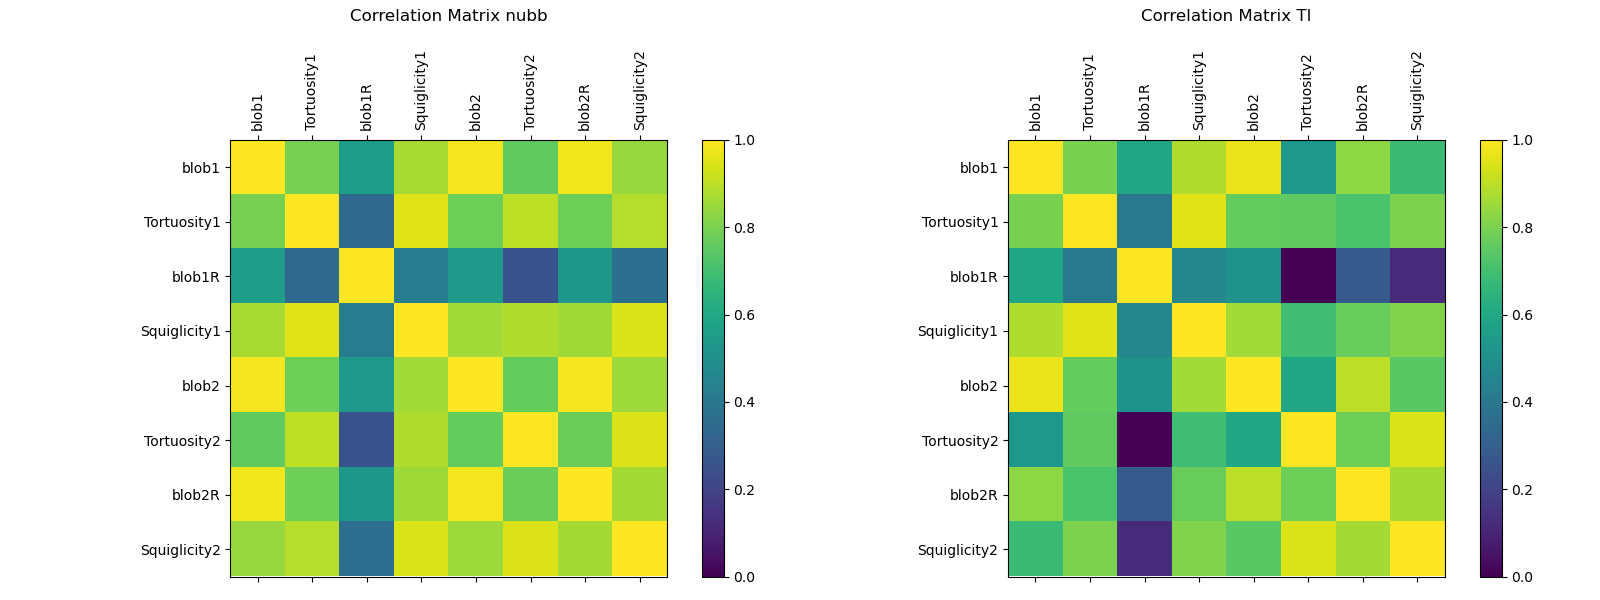

In [406]:
# Assuming df is your DataFrame
correlation_matrix_nubb = nubb_meta[['blob1','Tortuosity1','blob1R','Squiglicity1', 'blob2', 'Tortuosity2', 'blob2R', 'Squiglicity2']].corr(method='spearman')
correlation_matrix_Tl = Tl_meta[['blob1','Tortuosity1','blob1R','Squiglicity1', 'blob2', 'Tortuosity2', 'blob2R', 'Squiglicity2']].corr(method='spearman')

# Display the correlation matrix
print(correlation_matrix)

# Optional: Heatmap visualization
fig, axs = plt.subplots(1, 2, figsize=(16, 6))


cax_nubb = axs[0].matshow(correlation_matrix_nubb, cmap="viridis", vmin=0.0, vmax=1)

# Add color bar
plt.colorbar(cax_nubb)

# Set axis labels
axs[0].set_xticks(np.arange(len(correlation_matrix_nubb.columns)))
axs[0].set_yticks(np.arange(len(correlation_matrix_nubb.columns)))
axs[0].set_xticklabels(correlation_matrix_nubb.columns, rotation=90)
axs[0].set_yticklabels(correlation_matrix_nubb.columns)
axs[0].set_title("Correlation Matrix nubb", pad=20)


cax_Tl = axs[1].matshow(correlation_matrix_Tl, cmap="viridis", vmin=0.0, vmax=1)

# Add color bar
plt.colorbar(cax_Tl)

# Set axis labels
axs[1].set_xticks(np.arange(len(correlation_matrix_Tl.columns)))
axs[1].set_yticks(np.arange(len(correlation_matrix_Tl.columns)))
axs[1].set_xticklabels(correlation_matrix_Tl.columns, rotation=90)
axs[1].set_yticklabels(correlation_matrix_Tl.columns)
axs[1].set_title("Correlation Matrix Tl", pad=20)

plt.tight_layout()
plt.show()

Running cuts with
Pressure: 1 bar
Diffusion: nodiff
Targ efficiency: 30 %
Running cuts with
Pressure: 1 bar
Diffusion: nodiff
Targ efficiency: 30 %
Efficiency nubb: 30.25  +/- 0.11 %
Bkg Rej: Bkg: 0.18 +/- 0.01 %      (bkg rej == 99.82 %)
FOM: 7.150399620173514
Num Sig: 56335
Num Bkg: 615


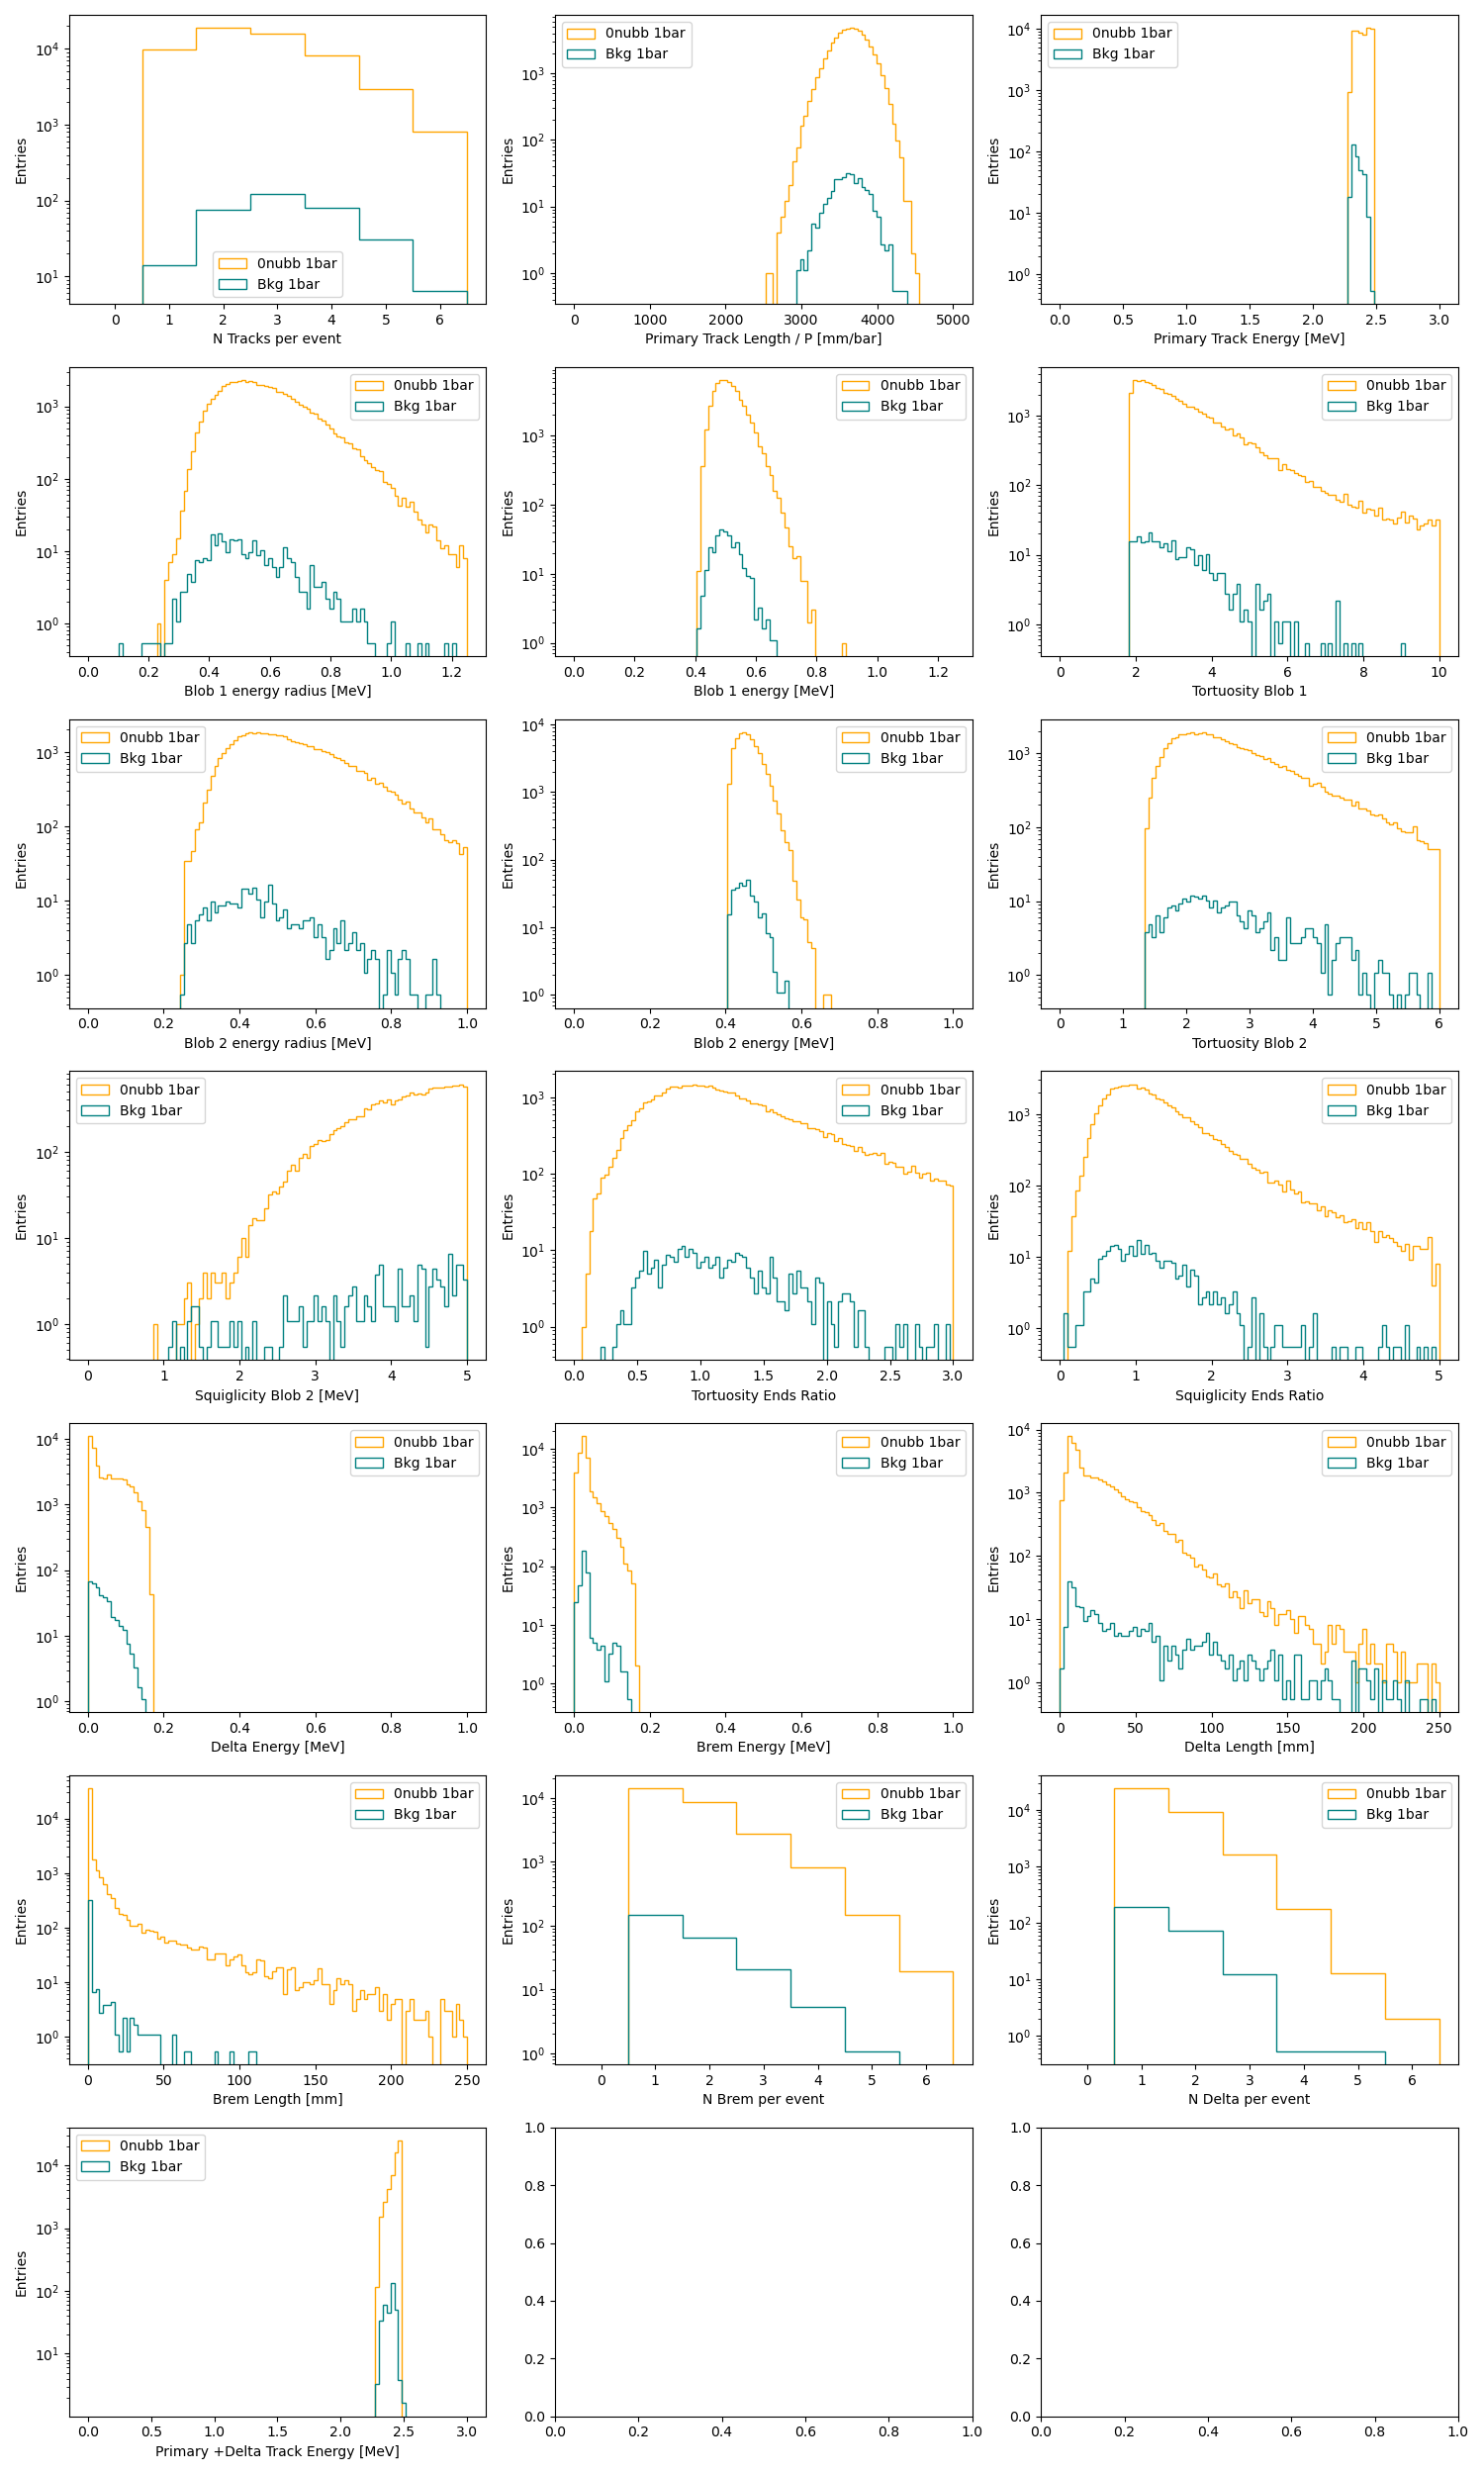

In [430]:
def FOM(eff, bkg_eff):
    return eff/np.sqrt(bkg_eff)

def CalcEfficiency(n, N, label):
    efficiency = n/N
    error=np.sqrt( (efficiency/N) * (1-efficiency)  )

    if (label == "Bkg"):
        print(f"Bkg Rej: {label}:", round(100*efficiency, 2), "+/-", round(100*error,2),  "%", "     (bkg rej ==", round(100-100*efficiency,2), "%)")
    else:
        print(f"Efficiency {label}:",  round(100*efficiency, 2), " +/-", round(100*error,2),  "%")

    return efficiency, error


# Function to compute count-based ratio per event_id
def compute_ratio(group):
    # Group 1: Count of Primary + Delta*
    count_group1 = group[group["label"].str.startswith(("Primary", "Delta"))].shape[0]

    # Group 2: Count of Brem* where 0.025 < energy < 0.035 (X-rays)
    count_xrays = group[(group["label"].str.startswith("Brem")) & (group["energy"].between(0.025, 0.035))].shape[0]

    # Group 3: Count of Brem* where energy ≤ 0.025 or ≥ 0.035
    count_group3 = group[(group["label"].str.startswith("Brem")) & (~group["energy"].between(0.025, 0.035))].shape[0]

    # Compute ratio
    ratio = count_xrays / (count_group1 + count_group3)
    
    return ratio

# applies cuts to the delta, brem and primary+delta energies
def ApplyGeneralCuts(df_meta, df_primary, cut_brem, cut_delta, cut_trk_e):

    brems  = GetBrems(df_meta)

    brems = brems[brems.energy > cut_brem] # these are events to cut

    df_meta = df_meta[~df_meta.event_id.isin(brems.event_id.unique())]
    df_primary = df_primary[~df_primary.event_id.isin(brems.event_id.unique())]

    deltas  = GetDeltas(df_meta)

    deltas = deltas[deltas.energy > cut_delta] # these are events to cut

    df_meta = df_meta[~df_meta.event_id.isin(deltas.event_id.unique())]
    df_primary = df_primary[~df_primary.event_id.isin(deltas.event_id.unique())]


    filtered_df = df_meta[ ~df_meta["label"].str.contains("Brem", na=False)]
    filtered_df =filtered_df[filtered_df.energy>0.01]
    trk_energies = filtered_df.groupby(["event_id"])["energy"].sum()
    trk_energies = trk_energies[trk_energies > cut_trk_e]
    unique_events_list = trk_energies.index.unique().tolist()

    df_meta = df_meta[~df_meta.event_id.isin(unique_events_list)]
    df_primary = df_primary[~df_primary.event_id.isin(unique_events_list)]

    return df_meta, df_primary


def ApplyCuts(df_meta, df_primary, pressure, diffusion, eff_targ):

    cuts = []

    # 1 bar
    if (pressure == 1):
       
       # 1bar no diff
        if (diffusion == "nodiff"):
            
            # 30% signal eff
            if (eff_targ == 30):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.175, 0.175, 2.5)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.41) & (df_primary.blob1 > 0.4) & (df_primary.energy > 2.3) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.35) & (df_primary.Tortuosity1 > 1.85)
            
            # 60% signal eff
            elif (eff_targ == 60):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.3, 0.3, 2.5)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.25) & (df_primary.blob1 > 0.25) & (df_primary.energy > 2.15) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.2) & (df_primary.Tortuosity1 > 1.6)
            
            # 90% signal eff
            elif (eff_targ == 90):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary,3, 0.75, 2.5)
                cuts =  (df_primary.blob2R > 0.24) &  (df_primary.Tortuosity2 > 1.15) &  (df_primary.energy > 1.72) & (df_primary.energy < 2.5)

            else:
                print("Unknown efficiency target specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 5%
        elif (diffusion == "5percent"):
            # 30% signal eff
            if (eff_targ == 30):
                cuts = (df_primary.blob2R > 0.4) & (df_primary.blob2 > 0.4)     & (df_primary.blob1R > 0.4) & (df_primary.energy > 2.4) & \
                    (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 2) & (df_primary.Squiglicity2 > 1)

            # 60% signal eff
            elif (eff_targ == 60):
                cuts = (df_primary.blob2R > 0.4) & (df_primary.blob2 > 0.4) & (df_primary.blob1R > 0.4) & (df_primary.Tortuosity2 > 1.2) & (df_primary.Tortuosity1 > 1.7) & (df_primary.energy > 1.9) & (df_primary.energy < 2.5)

            # 90% signal eff
            elif (eff_targ == 90):
                cuts = (df_primary.blob2R > 0.33) & (df_primary.blob1R > 0.3) & (df_primary.energy < 2.5)

            else:
                print("Unknown efficiency target specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.25%
        elif (diffusion == "0.25percent"):
            # 30% signal eff
            if (eff_targ == 30):
                cuts = (df_primary.blob2R > 0.35) & (df_primary.blob2 > 0.3)     & (df_primary.blob1R > 0.3) & (df_primary.energy > 2.4) & \
                    (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.6) & (df_primary.Squiglicity2 > 0.5)

            # 60% signal eff
            elif (eff_targ == 60):
                cuts = (df_primary.blob2R > 0.4) & (df_primary.blob2 > 0.4) & (df_primary.blob1R > 0.4) & (df_primary.energy > 1.9) & (df_primary.energy < 2.5)

            # 90% signal eff
            elif (eff_targ == 90):
                cuts = (df_primary.blob2R > 0.275) & (df_primary.blob1R > 0.28) & (df_primary.energy < 2.5)

            else:
                print("Unknown efficiency target specified")

        else:
            print("Unknown diffusion specified")
    # -------------------------------------------------------------------------------------------------------------------------------------
    # 5bar
    elif (pressure == 5):
    
        # 5 bar no diff
        if (diffusion == "nodiff"):
            
            # 30% signal eff
            if (eff_targ == 30):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.35) & (df_primary.blob1 > 0.35) & (df_primary.energy > 2.3) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.35) & (df_primary.Tortuosity1 > 1.65)
            
            # 60% signal eff
            elif (eff_targ == 60):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                cuts = (df_primary.blob2R > 0.2) & (df_primary.blob2 > 0.25) & (df_primary.blob1 > 0.25) & (df_primary.energy > 2.1) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.25) & (df_primary.Tortuosity1 > 1.25)
            
            # 90% signal eff
            elif (eff_targ == 90):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.46, 3,2.5)
                cuts =  (df_primary.blob2R > 0.21) & (df_primary.blob1R > 0.19) & (df_primary.energy > 0) & (df_primary.energy < 2.5)

            else:
                print("Unknown efficiency target specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 10bar
    elif (pressure == 10):

        # 10bar no diff
        if (diffusion == "nodiff"):
            # 30% signal eff
            if (eff_targ == 30):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.17, 0.17, 2.5)
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.25) & (df_primary.blob1 > 0.25) & (df_primary.energy > 2.1) & (df_primary.energy < 2.5)  & (df_primary.Tortuosity2 > 1.27) & (df_primary.Tortuosity1 > 1.25)
            
            # 60% signal eff
            elif (eff_targ == 60):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.125, 3, 2.5)
                cuts = (df_primary.blob2R > 0.2) & (df_primary.blob2 > 0.15) & (df_primary.blob1 > 0.15) & (df_primary.energy > 2.35) & (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.02)
        
            # 90% signal eff
            elif (eff_targ == 90):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.46, 3,2.5)
                cuts =  (df_primary.blob2R > 0.21) & (df_primary.blob1R > 0.19) & (df_primary.energy > 0) & (df_primary.energy < 2.5)

            else:
                print("Unknown efficiency target specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 15bar
    elif (pressure == 15):
        
        # 15bar no diff
        if (diffusion == "nodiff"):
        
            # 30% signal eff
            if (eff_targ == 30):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.175, 3, 2.5)
                cuts = (df_primary.blob2R > 0.32) & (df_primary.blob2 > 0.32) & (df_primary.blob1 > 0.4) & (df_primary.energy > 2.35) & (df_primary.energy < 2.5) & (df_primary.Tortuosity2 > 1.15)
            
            # 60% signal eff
            elif (eff_targ == 60):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.478, 3, 2.5)
                cuts = (df_primary.blob2R > 0.32) & (df_primary.blob2 > 0.32) & (df_primary.blob1 > 0.4) & (df_primary.energy > 2.35) & (df_primary.energy < 2.5)
        
            # 90% signal eff
            elif (eff_targ == 90):
                df_meta, df_primary = ApplyGeneralCuts(df_meta, df_primary, 0.478, 3,2.5)
                cuts =  (df_primary.blob2R > 0.17) & (df_primary.blob1R > 0.17) & (df_primary.energy > 0) & (df_primary.energy < 2.5)
            else:
                print("Unknown efficiency target specified")

        else:
            print("Unknown diffusion specified")

    else:
        print("Unknown pressure specified")

    return df_meta, df_primary, cuts

def PlotDistributionswithCuts(df_meta, col, label, pressure, diffusion, eff_targ, scale_factor):

    print("Running cuts with")
    print("Pressure:",  pressure,"bar")
    print("Diffusion:", diffusion )
    print("Targ efficiency:", eff_targ, "%")

    uselog=True

    df_primary = df_meta[ (df_meta.label == "Primary") & (df_meta.primary == 1)]

    # Apply the cuts
    df_meta, df_primary, cuts = ApplyCuts(df_meta, df_primary, pressure, diffusion, eff_targ)
    

    df_primary = df_primary[ cuts ]

    df_meta = df_meta[(df_meta.event_id.isin(df_primary.event_id.unique()))]

    df_counts      = GetNLongTracks(df_meta)
    df_counts_evts = df_counts[df_counts.N_tracks >= 1].event_id.unique()

    # Number of brems and deltas
    N_brem  = GetNParticles(df_meta, "Brem")
    N_delta = GetNParticles(df_meta, "Delta")

    # Dataframes containing brems and deltas
    deltas = GetDeltas(df_meta)
    brems  = GetBrems(df_meta)

    # This is the sum of the primary and delta energies attached to it
    trk_e = GetTrackDeltaEnergy(df_meta)

    # Calculate the ratio of x-rays to tracks
    # x_ray_ratio = df_meta.groupby("event_id").apply(compute_ratio).reset_index(name="ratio")


    weights        = np.ones_like(df_primary.energy)  * scale_factor
    weights_counts = np.ones_like(df_counts.N_tracks) * scale_factor
    weights_deltas = np.ones_like(deltas.energy)      * scale_factor
    weights_brem   = np.ones_like(brems.energy)       * scale_factor
    weights_Ndelta = np.ones_like(N_delta.N_Delta)    * scale_factor
    weights_Nbrem  = np.ones_like(N_brem.N_Brem)      * scale_factor
    weights_trke   = np.ones_like(trk_e)              * scale_factor

    bin_edges = np.arange(-0.5, 7.5, 1)
    bin_centers = np.arange(0, 7, 1)

    # Multiplicities
    axs[0,0].hist(df_counts.N_tracks, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_counts);
    # axs[0,0].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label);
    axs[0,0].set_xlabel("N Tracks per event")
    axs[0,0].set_ylabel("Entries")
    axs[0,0].set_xticks(bin_centers) ;
    axs[0,0].legend()
    if (uselog): axs[0,0].semilogy()

    axs[0,1].hist(df_primary.length, bins = np.linspace(0, 5000/pressure, 100), histtype="step", color = col, label = label, weights = weights);
    axs[0,1].set_xlabel("Primary Track Length / P [mm/bar]")
    axs[0,1].set_ylabel("Entries")
    axs[0,1].legend()
    if (uselog): axs[0,1].semilogy()

    axs[0,2].hist(df_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights);
    axs[0,2].set_xlabel("Primary Track Energy [MeV]")
    axs[0,2].set_ylabel("Entries")
    axs[0,2].legend()
    if (uselog): axs[0,2].semilogy()

    axs[1,1].hist(df_primary.blob1, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,1].set_xlabel("Blob 1 energy [MeV]")
    axs[1,1].set_ylabel("Entries")
    axs[1,1].legend()
    if (uselog): axs[1,1].semilogy()

    axs[2,1].hist(df_primary.blob2, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,1].set_xlabel("Blob 2 energy [MeV]")
    axs[2,1].set_ylabel("Entries")
    axs[2,1].legend()
    if (uselog): axs[2,1].semilogy()

    axs[1,0].hist(df_primary.blob1R, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,0].set_xlabel("Blob 1 energy radius [MeV]")
    axs[1,0].set_ylabel("Entries")
    axs[1,0].legend()
    if (uselog): axs[1,0].semilogy()

    axs[2,0].hist(df_primary.blob2R, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,0].set_xlabel("Blob 2 energy radius [MeV]")
    axs[2,0].set_ylabel("Entries")
    axs[2,0].legend()
    if (uselog): axs[2,0].semilogy()

    axs[1,2].hist(df_primary.Tortuosity1, bins = np.linspace(0, 10, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,2].set_xlabel("Tortuosity Blob 1")
    axs[1,2].set_ylabel("Entries")
    axs[1,2].legend()
    if (uselog): axs[1,2].semilogy()

    axs[2,2].hist(df_primary.Tortuosity2, bins = np.linspace(0, 6, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,2].set_xlabel("Tortuosity Blob 2")
    axs[2,2].set_ylabel("Entries")
    axs[2,2].legend()
    if (uselog): axs[2,2].semilogy()

    axs[3,0].hist(df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,0].set_xlabel("Squiglicity Blob 2 [MeV]")
    axs[3,0].set_ylabel("Entries")
    axs[3,0].legend()
    if (uselog): axs[3,0].semilogy()

    axs[3,1].hist(df_primary.Tortuosity1/df_primary.Tortuosity2, bins = np.linspace(0, 3, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,1].set_xlabel("Tortuosity Ends Ratio")
    axs[3,1].set_ylabel("Entries")
    axs[3,1].legend()
    if (uselog): axs[3,1].semilogy()

    axs[3,2].hist(df_primary.Squiglicity1/df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,2].set_xlabel("Squiglicity Ends Ratio")
    axs[3,2].set_ylabel("Entries")
    axs[3,2].legend()
    if (uselog): axs[3,2].semilogy()

    axs[4,0].hist(deltas.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,0].set_xlabel("Delta Energy [MeV]")
    axs[4,0].set_ylabel("Entries")
    axs[4,0].legend()
    if (uselog): axs[4,0].semilogy()

    axs[4,1].hist(brems.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[4,1].set_xlabel("Brem Energy [MeV]")
    axs[4,1].set_ylabel("Entries")
    axs[4,1].legend()
    if (uselog): axs[4,1].semilogy()

    axs[4,2].hist(deltas.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,2].set_xlabel("Delta Length [mm]")
    axs[4,2].set_ylabel("Entries")
    axs[4,2].legend()
    if (uselog): axs[4,2].semilogy()

    axs[5,0].hist(brems.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[5,0].set_xlabel("Brem Length [mm]")
    axs[5,0].set_ylabel("Entries")
    axs[5,0].semilogy()
    axs[5,0].legend()
    if (uselog): axs[5,0].semilogy()

    axs[5,1].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Nbrem);
    axs[5,1].set_xlabel("N Brem per event")
    axs[5,1].set_ylabel("Entries")
    axs[5,1].set_xticks(bin_centers) ;
    axs[5,1].legend()
    if (uselog): axs[5,1].semilogy()

    axs[5,2].hist(N_delta.N_Delta, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Ndelta);
    axs[5,2].set_xlabel("N Delta per event")
    axs[5,2].set_ylabel("Entries")
    axs[5,2].set_xticks(bin_centers) ;
    axs[5,2].legend()
    if (uselog): axs[5,2].semilogy()

    axs[6,0].hist(trk_e, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights_trke);
    axs[6,0].set_xlabel("Primary +Delta Track Energy [MeV]")
    axs[6,0].set_ylabel("Entries")
    axs[6,0].legend()
    if (uselog): axs[6,0].semilogy()


    bin_edges = np.arange(-0.5, 3.5, 0.5)
    bin_centers = np.arange(0, 3, 0.5)

    # Multiplicities
    # axs[6,1].hist(x_ray_ratio.ratio, bins = bin_edges, histtype="step", color = col, label = label);
    # axs[6,1].set_xlabel("N x-rays per track")
    # axs[6,1].set_ylabel("Entries")
    # axs[6,1].set_xticks(bin_centers) ;
    # axs[6,1].legend()
    # if (uselog): axs[6,1].semilogy()



    plt.tight_layout()

    return df_primary.event_id.unique()



fig, axs = plt.subplots(7, 3, figsize=(15, 25))

nubb_cut = PlotDistributionswithCuts(nubb_meta, "orange", "0nubb 1bar",pressure, diff, 30, 1)
Bkg_cut  = PlotDistributionswithCuts(Bkg_meta,  "Teal",   "Bkg 1bar",  pressure, diff, 30, sf_bkg)

nubb_cut_num = len(nubb_cut)
Bkg_cut_num  = len(Bkg_cut)


nubb_eff, nubb_err =  CalcEfficiency(nubb_cut_num, nubb_events, "nubb")
Bkg_eff, Bkg_err   =  CalcEfficiency(Bkg_cut_num, Bkg_events, "Bkg")

# print("nubb: ", nubb_events, nubb_cut_num, 100*nubb_cut_num/nubb_events)
# print("Bkg: ", Bkg_events, Bkg_cut_num, 100-100*Bkg_cut_num/Bkg_events)
print("FOM:", FOM(nubb_cut_num/nubb_events, Bkg_cut_num/Bkg_events))

print("Num Sig:", nubb_cut_num)
print("Num Bkg:", Bkg_cut_num)

# To plot:
# Get the number of x-rays in the event and plot that vs the number of tracks in the event. gammas should have a 1 to 1 correspondance, whereas signal should be reduced.
# tracking algo: new function to group clusters and then only connect based on the grouped clusters. This clustering should first be binned then labelled based on the proximity.  
# add x-ray label to the label tree other than brem


479
{0: [1, 3], 1: [0, 2], 2: [1, 4], 3: [5, 0], 5: [3, 7], 7: [5, 9], 6: [8, 4], 8: [6, 10], 9: [7, 11], 10: [8, 15], 11: [16, 9], 16: [11, 23], 12: [14, 13], 14: [12, 19], 13: [17, 12], 17: [13, 22], 15: [18, 10], 18: [15, 20], 23: [16, 25], 22: [17, 24], 20: [18, 21], 19: [14, 21], 21: [20, 19], 24: [22, 26], 25: [28, 23], 28: [25, 30], 26: [27, 24], 27: [26, 29], 30: [28, 34], 29: [27, 31], 31: [33, 29], 33: [31, 32], 32: [33, 35], 34: [36, 30], 36: [34, 38], 35: [37, 32], 37: [35, 39], 39: [37, 42], 38: [41, 36], 41: [38, 40], 40: [43, 41], 43: [40, 48], 42: [46, 39], 46: [42, 51], 48: [43, 45], 45: [47, 48], 47: [45, 50], 49: [52, 50], 52: [49, 44], 50: [47, 49], 51: [46, 56], 53: [55, 54], 55: [53, 61], 54: [57, 53], 57: [54, 59], 56: [58, 51], 58: [56, 60], 60: [58, 59], 59: [60, 57], 61: [62, 55], 62: [61, 63], 63: [62, 64], 64: [66, 63], 66: [64, 68], 65: [67, 69], 67: [65, 71], 68: [70, 66], 70: [68, 74], 69: [72, 65], 72: [69, 73], 74: [70, 77], 71: [67, 75], 73: [72, 76], 

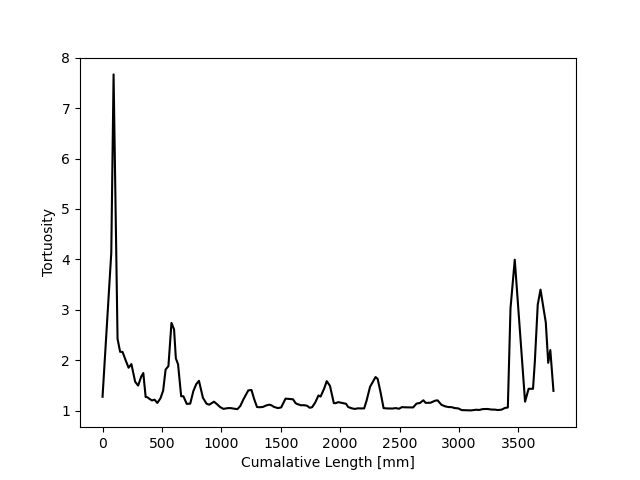

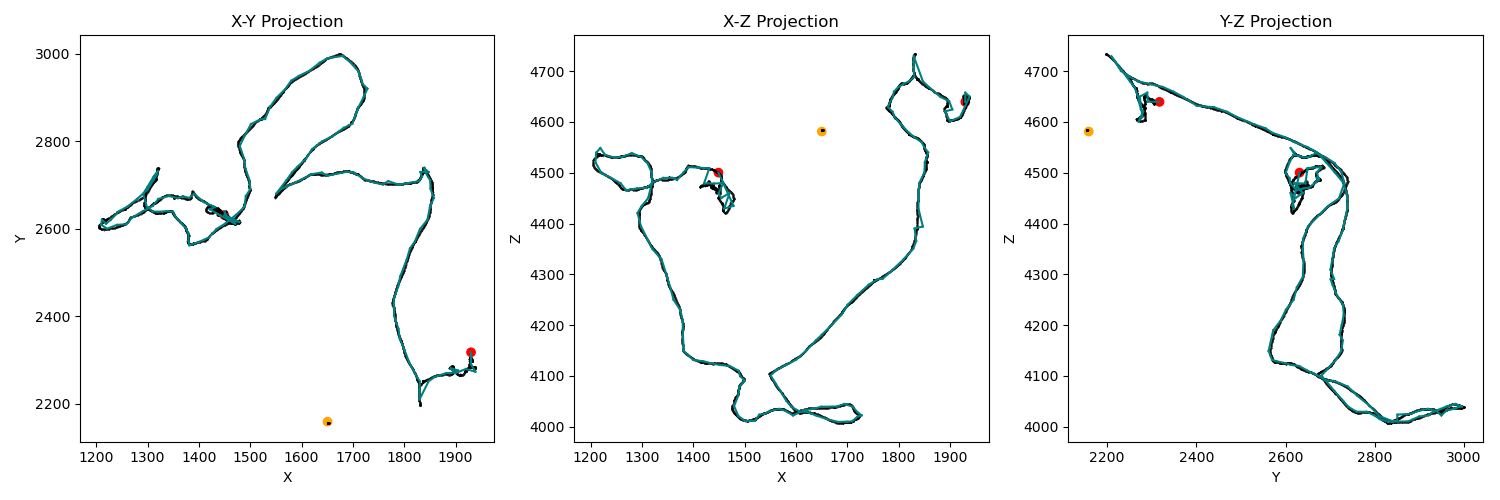

In [165]:
# 3D event display
%matplotlib widget



print(len(Bkg_cut))


# evid = 26984036
evid= Bkg_cut[10]

event       = Bkg[Bkg.event_id == evid]
event.index = event.id
Track       = Bkg_Tracks[evid]
connection  = Bkg_connections[evid]
connection_count = Bkg_connection_counts[evid]
event_hits_true  = Bkg_true_hits[Bkg_true_hits.event_id == evid]
event_parts_true = Bkg_true_parts[Bkg_true_parts.event_id == evid]
event_diffused_hits = Bkg_diffused_hits[Bkg_diffused_hits.event_id == evid]

print(connection)

plt.figure()

# plt.hist2d(event.cumulative_distance, event.angle, bins = 20,cmin=3);
plt.plot(event[event.primary == 1].cumulative_distance, event[event.primary == 1].Tortuosity, color="k");

plt.xlabel("Cumalative Length [mm]")
plt.ylabel("Tortuosity")

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot xy projection
plot_tracks(axs[0], event['x'], event['y'], connection_count, 'X', 'Y', Track)
axs[0].scatter(event_hits_true['x'], event_hits_true['y'], marker='o',c="k", s=0.1)

# Plot xz projection
plot_tracks(axs[1], event['x'], event['z'], connection_count, 'X', 'Z', Track)
axs[1].scatter(event_hits_true['x'], event_hits_true['z'], marker='o',c="k", s=0.1)

# Plot yz projection
plot_tracks(axs[2], event['y'], event['z'], connection_count, 'Y', 'Z', Track)
axs[2].scatter(event_hits_true['y'], event_hits_true['z'], marker='o',c="k", s=0.1)

plt.tight_layout()



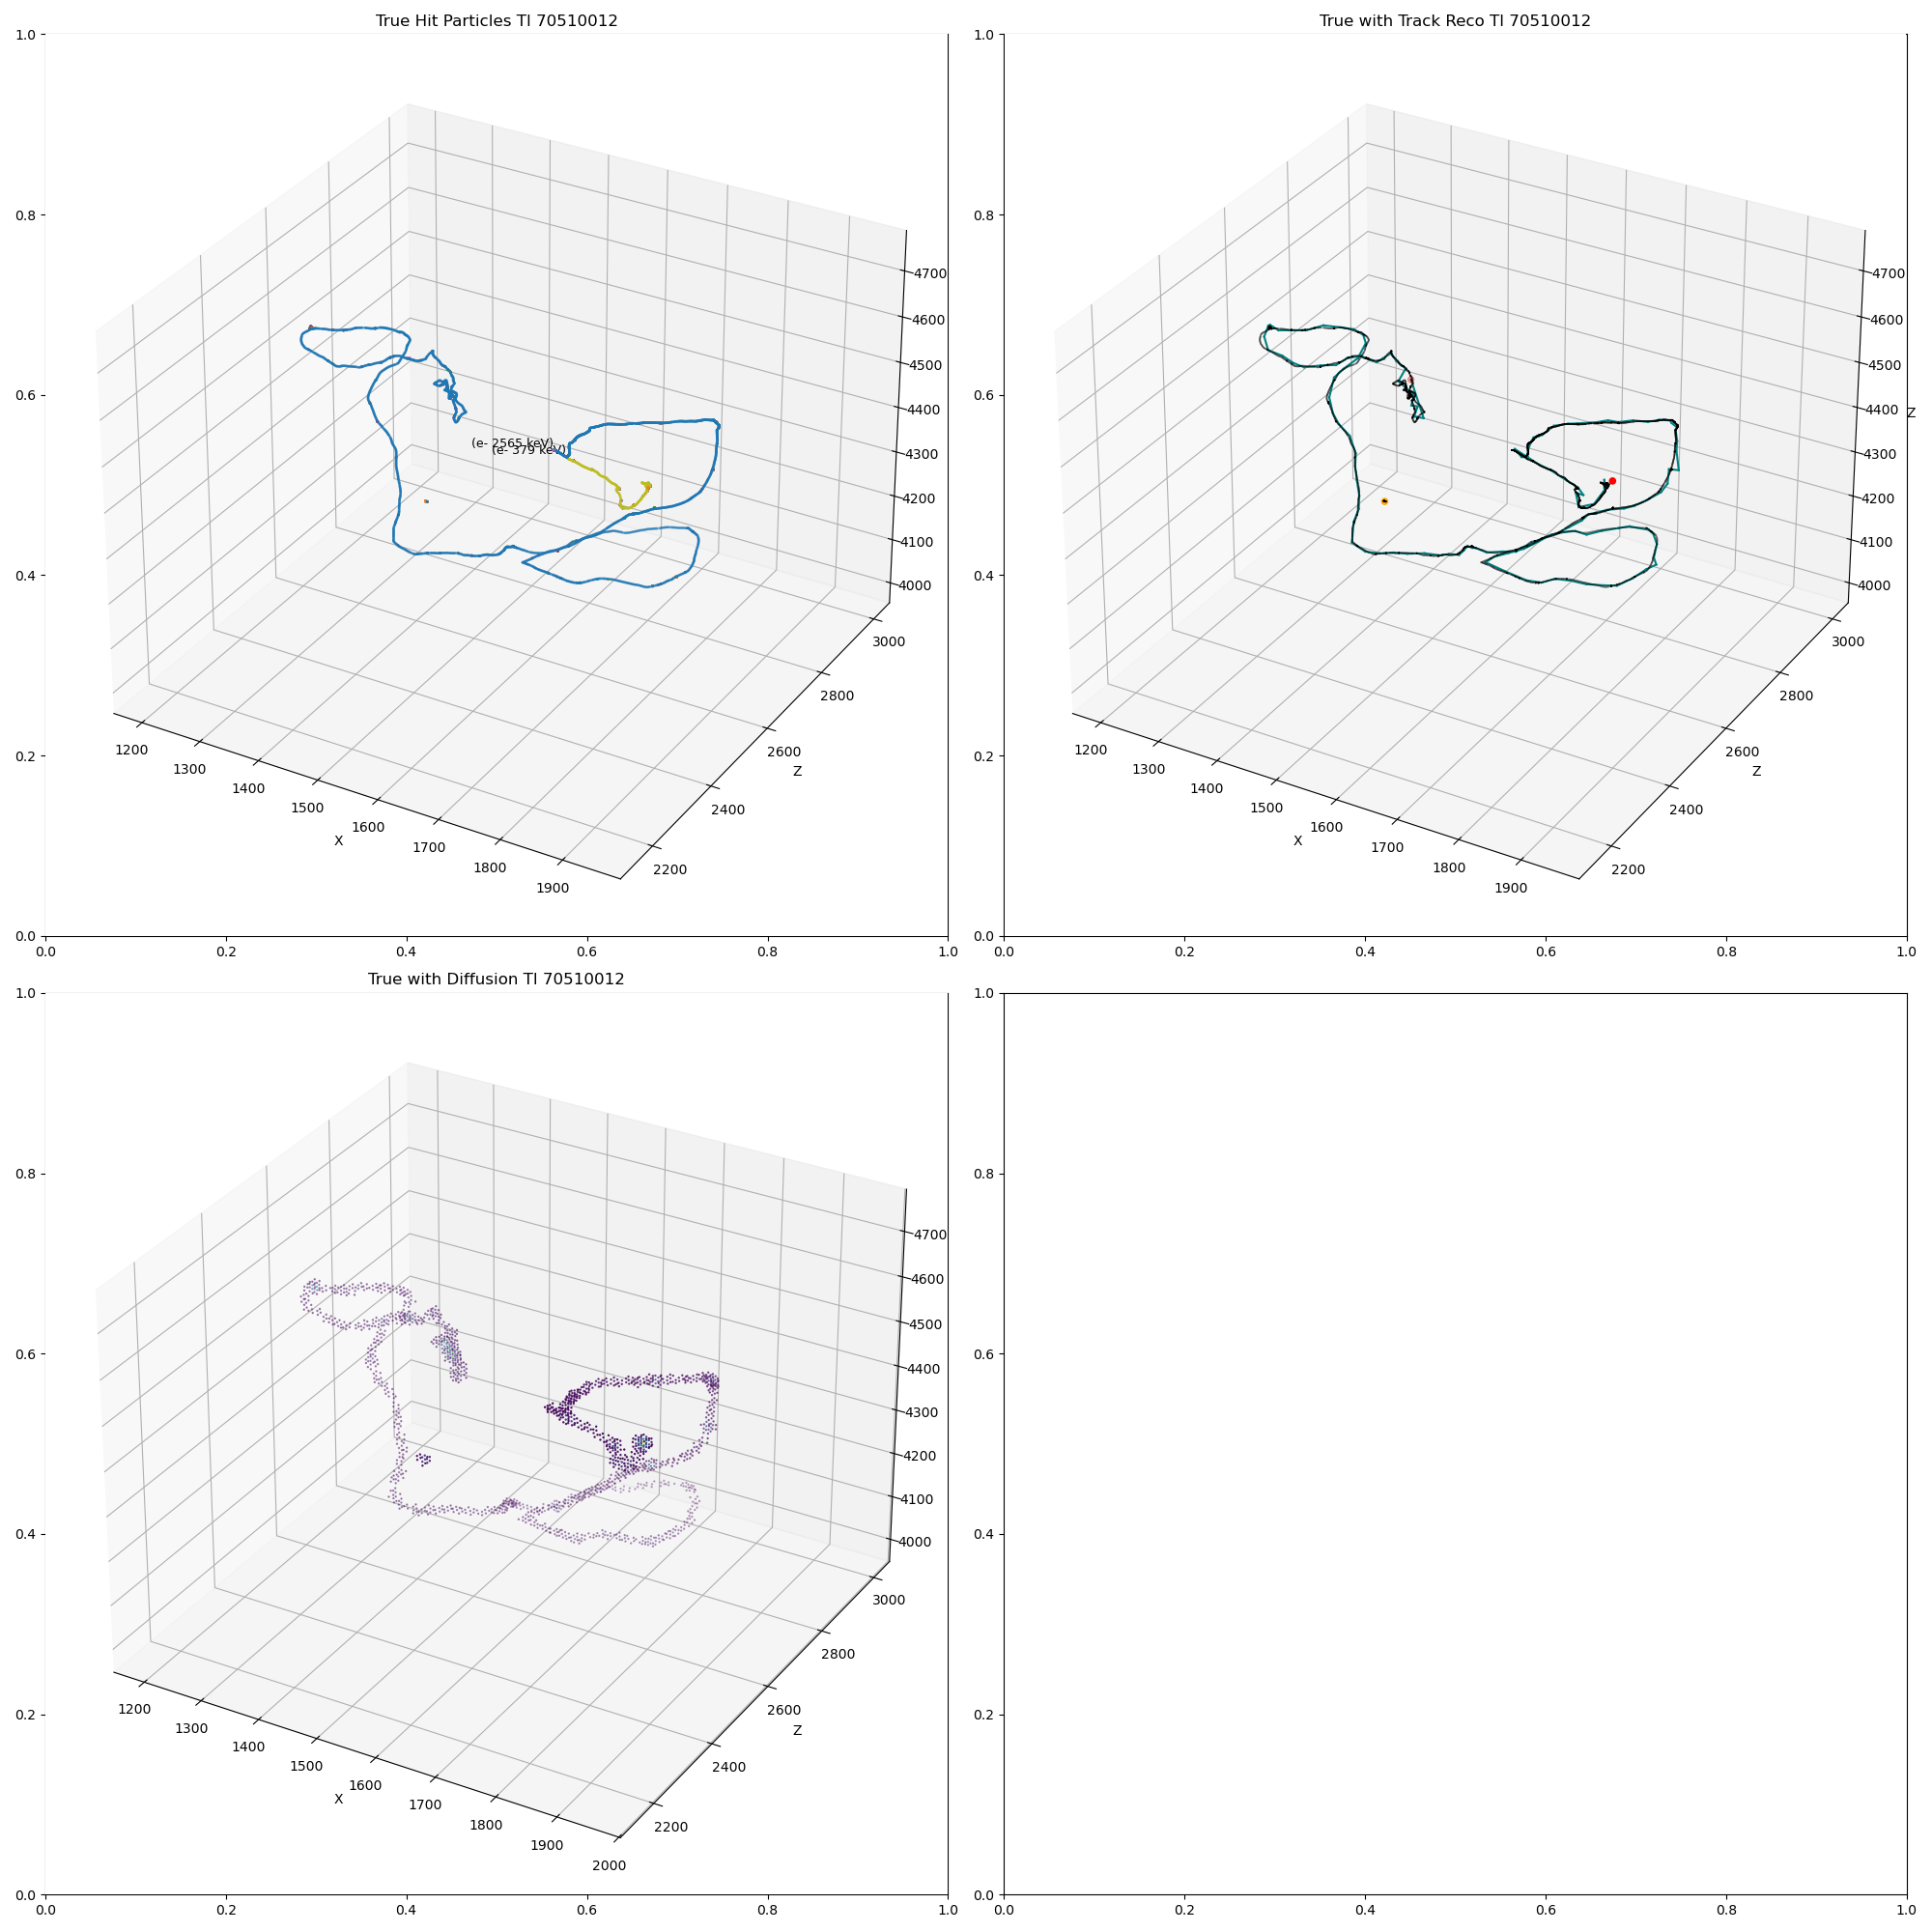

In [166]:
# 3D Projection
# plt.figure()
# Create two side-by-side subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# --- First plot: 3D Projection ---
ax_3D = fig.add_subplot(221, projection='3d')
for p in event_hits_true.particle_id.unique():

    ax_3D.scatter(event_hits_true[event_hits_true.particle_id == p]['x'], 
                  event_hits_true[event_hits_true.particle_id == p]['y'], 
                  event_hits_true[event_hits_true.particle_id == p]['z'], 
                  marker='o', s=1)

for index, row in event_parts_true[event_parts_true.kin_energy > 0.1].iterrows():
    Energy = round(row["kin_energy"] * 1000)
    particle_name = row["particle_name"]

    if particle_name == "gamma":
        continue

    ax_3D.text(row["initial_x"], row["initial_y"], row["initial_z"] + 3000, 
               f"({particle_name} {Energy} keV)", fontsize=9, ha='right', va='bottom', color='black')


ax_3D.set_title(f"True Hit Particles {event.Type.iloc[0]} {evid}")
ax_3D.set_xlabel("X")
ax_3D.set_ylabel("Y")
ax_3D.set_ylabel("Z")

# --- Second plot: Example scatter plot ---
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(event_hits_true['x'], event_hits_true['y'], event_hits_true['z'],c="k", s=0.1)
plot_tracks_3D(ax2, event['x'], event['y'], event['z'], connection_count, Track)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_ylabel("Z")
ax2.set_title(f"True with Track Reco {event.Type.iloc[0]} {evid}")


event_diffused_hits = CutandRedistibuteEnergy(event_diffused_hits, 0.0004)
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(event_diffused_hits['x'], event_diffused_hits['y'], event_diffused_hits['z'],c=event_diffused_hits['energy'], s=0.5)
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_ylabel("Z")
ax3.set_title(f"True with Diffusion {event.Type.iloc[0]} {evid}")


plt.tight_layout()
plt.show()


In [134]:
display(event_parts_true[event_parts_true.kin_energy>0.1])
display(event_parts_true)

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
8354,126300013,1,gamma,1,0,2213.107422,-508.710327,-1122.521729,0.000000,1679.144165,...,-1.807621,1.007665,-1.573887,-0.0,0.0,-0.0,2.600000,768.028625,none,phot
8392,126300013,2,e-,0,1,1679.144165,-211.050568,-1587.441040,2.561868,1044.450439,...,-2.494369,0.768608,-1.546186,-0.0,-0.0,-0.0,2.565435,3139.085205,phot,eIoni
8572,126300013,105,e-,0,2,1109.193481,-209.963257,-2194.352295,9.544023,1113.668823,...,0.120728,0.329507,-0.068514,0.0,-0.0,-0.0,0.112671,66.822060,eIoni,eIoni
8830,126300013,47,e-,0,2,1510.761841,-172.725082,-1705.270752,3.286844,1587.459961,...,0.118575,0.322151,-0.786943,0.0,-0.0,0.0,0.488121,626.734253,eIoni,eIoni


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
8354,126300013,1,gamma,1,0,2213.107422,-508.710327,-1122.521729,0.000000,1679.144165,...,-1.807621,1.007665,-1.573887,-0.0,0.0,-0.0,2.600000,768.028625,none,phot
8355,126300013,19,e-,0,1,1679.144165,-211.050568,-1587.441040,2.561868,1679.145020,...,0.003610,-0.001733,0.002231,-0.0,0.0,-0.0,0.000021,0.001804,phot,msc
8356,126300013,18,e-,0,1,1679.144165,-211.050568,-1587.441040,2.561868,1679.143921,...,-0.003986,0.002013,0.001783,0.0,-0.0,-0.0,0.000023,0.000281,phot,msc
8357,126300013,17,e-,0,1,1679.144165,-211.050568,-1587.441040,2.561868,1679.144653,...,0.002786,-0.002826,-0.002295,-0.0,-0.0,-0.0,0.000021,0.000906,phot,msc
8358,126300013,16,e-,0,1,1679.144165,-211.050568,-1587.441040,2.561868,1679.143921,...,-0.000775,0.002792,0.003552,-0.0,0.0,0.0,0.000021,0.001905,phot,eIoni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8981,126300013,43,e-,0,2,1549.228149,-180.395309,-1660.310181,3.084151,1549.225586,...,-0.025301,-0.027364,0.013934,0.0,0.0,0.0,0.001547,0.043934,eIoni,eIoni
8982,126300013,42,e-,0,2,1667.558716,-207.542068,-1594.589722,2.609437,1667.540894,...,-0.029985,0.005312,0.047278,-0.0,-0.0,0.0,0.003085,0.155787,eIoni,eIoni
8983,126300013,41,e-,0,2,1670.530151,-208.346222,-1592.865845,2.597500,1670.777344,...,0.045836,0.062841,-0.064305,-0.0,0.0,0.0,0.009871,1.093965,eIoni,eIoni
8984,126300013,632,e-,0,41,1670.767090,-208.432632,-1592.910400,2.605728,1670.748291,...,-0.035554,-0.026539,-0.008354,-0.0,-0.0,0.0,0.001990,0.091613,eIoni,eIoni


In [135]:
# Save all the background events




# for i, evid in enumerate(Tl_topology_evts):
#     event = Tl[Tl.event_id == evid]
#     event.index = event.id
#     Track = Tracks_Tl[evid]
#     connection = connections_Tl[evid]
#     connection_count = connection_counts_Tl[evid]

#     # Tortuosity plot
#     plt.figure()
#     plt.plot(event[event.primary == 1].cumulative_distance, event[event.primary == 1].Tortuosity, color="k")
#     plt.xlabel("Cumulative Length [mm]")
#     plt.ylabel("Tortuosity")
#     plt.title(f"Event {evid}")
#     plt.savefig(f"plots/Dave/SelectedBkg/Background_Evt{evid}_Tortuosity.pdf")

#     if i == 0:
#         plt.show()  # Show only the first figure
#     else:
#         plt.close()  # Close the figure to avoid displaying

#     # Create subplots for 3D projections
#     fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#     # Plot projections
#     plot_tracks(axs[0], event['x'], event['y'], connection_count, 'X', 'Y', Track)
#     plot_tracks(axs[1], event['x'], event['z'], connection_count, 'X', 'Z', Track)
#     plot_tracks(axs[2], event['y'], event['z'], connection_count, 'Y', 'Z', Track)

#     fig.suptitle(f"Event {evid}")

#     plt.tight_layout()
#     plt.savefig(f"plots/Dave/SelectedBkg/Background_Evt{evid}.pdf")
    
#     plt.close(fig)  # Close the figure after saving to prevent display


# def SaveInteractive3D(event_hits, filename):
#     fig = px.scatter_3d(event_hits, x='x', y='y', z='z', color='energy',
#                          title="3D Event Display", color_continuous_scale="Spectral")
    
#     fig.update_layout(scene=dict(
#         xaxis_title="X [mm]",
#         yaxis_title="Y [mm]",
#         zaxis_title="Z [mm]",
#         bgcolor='black',
#         xaxis=dict(
#             showbackground=False,  # Remove X plane
#             showgrid=False,
#             zeroline=False
#         ),
#         yaxis=dict(
#             showbackground=False,  # Remove Y plane
#             showgrid=False,
#             zeroline=False
#         ),
#         zaxis=dict(
#             showbackground=False,  # Remove Z plane
#             showgrid=False,
#             zeroline=False
#         ),
#     ))

#     pio.write_html(fig, filename)  # Save as interactive HTML file

# for i, evid in enumerate(Tl_topology_evts):
#     event = Tl[Tl.event_id == evid]

#     SaveInteractive3D(event, f"plots/Dave/SelectedBkg/Background_Evt{evid}_3D.html")

